In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.datasets import mnist

# Intro to Deep Learning
## Logistic Regression

In [3]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

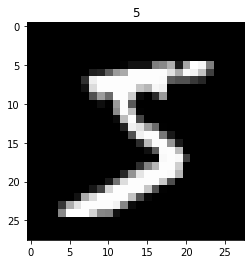

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
# Regularization 1 - L2, L1, elastic net
# Dense(512, activation="relu", kernel_regularizer="l2"),
# Dense(10, activation="softmax", kernel_regularizer="l2")

# Regularization 2 - reduced layer
# Dense(12, activation="relu"),

# Regularization 3 - deeper model
# Dense(32, activation="relu"),
# Dense(16, activation="relu"),
# Dense(10, activation="softmax")

# Regularization 3 - Dropout
# Dense(32, activation="relu"),
# Dropout(0.2),
# Dense(16, activation="relu"),
# Dropout(0.2),
# Dense(10, activation="softmax")

mnist_model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

In [7]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
____________________________________________________

In [8]:
mnist_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

In [9]:
mnist_model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.6750 - sparse_categorical_accuracy: 0.7868
Epoch 2/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3979 - sparse_categorical_accuracy: 0.8824
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3430 - sparse_categorical_accuracy: 0.8992
Epoch 4/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3132 - sparse_categorical_accuracy: 0.9088
Epoch 5/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2960 - sparse_categorical_accuracy: 0.9132


In [10]:
# loss funcions and metrics
mnist_model.evaluate(x_train, y_train)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.14515687018434206, 0.9566333]

In [11]:
mnist_model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.17369927682615816, 0.9488]